In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Loading Data
data=pd.read_csv("ipl_data.csv")

In [7]:
#first look of the data,head() returns the first 5 rows of the dataset
data.head()

,Player Name,Team,Nationality,Player_Type,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
0,Shikhar Dhawan,Punjab,Indian,Batter,1,192.0,5783.0,34.63,126.60,4.0,16.5,8.25,12.0,NaN,NaN,NaN
1,Shreyas Iyer,Kolkata,Indian,Batter,1,87.0,2375.0,31.67,123.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Faf Du Plessis,Bangalore,Overseas,Batter,1,100.0,2935.0,34.94,131.09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Manish Pandey,Lucknow,Indian,Batter,1,154.0,3560.0,30.69,121.83,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Shimron Hetmyer,Rajasthan,Overseas,Batter,1,31.0,517.0,25.85,151.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#discribe function will return the necessary information like count,mean,std deviation,etc for entire dataset.
data.describe()

,Capped,Matches_Played,Runs,Average,Strike_Rate,Wickets,Bowling_average,Economy,Bowling_Strike_Rate,Catches,Run_outs,Stumps
count,235.000000,215.000000,165.000000,161.000000,163.000000,140.000000,135.000000,143.000000,119.000000,27.000000,27.000000,27.000000
mean,0.838298,43.897674,840.575758,21.792391,121.009939,31.485714,32.907185,8.223182,24.686134,30.962963,3.444444,6.259259
std,0.561802,48.695302,1270.341831,11.664156,30.739189,36.872420,18.191441,1.223541,12.982049,34.544822,5.010246,9.928950
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.360000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,11.500000,67.000000,13.800000,112.635000,6.000000,23.025000,7.390000,18.495000,3.500000,0.000000,0.000000
50%,1.000000,25.000000,289.000000,22.410000,128.630000,19.500000,29.070000,8.190000,21.750000,19.000000,1.000000,2.000000
75%,1.000000,56.000000,954.000000,29.300000,137.550000,40.500000,36.030000,8.785000,26.190000,51.500000,4.000000,7.000000
max,2.000000,220.000000,6283.000000,58.500000,190.240000,167.000000,153.000000,13.120000,108.000000,126.000000,21.000000,39.000000


In [18]:
#checing the number of null values using isna().sum()method
data.isna().sum()

Player Name              0
Team                     0
Nationality              0
Player_Type              0
Capped                   0
Matches_Played          20
Runs                    70
Average                 74
Strike_Rate             72
Wickets                 95
Bowling_average        100
Economy                 92
Bowling_Strike_Rate    116
Catches                208
Run_outs               208
Stumps                 208
dtype: int64

In [17]:
#checking the information about the dataset like null objects and the data type of each of the elements in the data by info() method
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Player Name          235 non-null    object 
 1   Team                 235 non-null    object 
 2   Nationality          235 non-null    object 
 3   Player_Type          235 non-null    object 
 4   Capped               235 non-null    int64  
 5   Matches_Played       215 non-null    float64
 6   Runs                 165 non-null    float64
 7   Average              161 non-null    float64
 8   Strike_Rate          163 non-null    float64
 9   Wickets              140 non-null    float64
 10  Bowling_average      135 non-null    float64
 11  Economy              143 non-null    float64
 12  Bowling_Strike_Rate  119 non-null    float64
 13  Catches              27 non-null     float64
 14  Run_outs             27 non-null     float64
 15  Stumps               27 non-null     flo

In [11]:
#CLEANING THE DATA

#segregating Data - Capped Batters 
#I have kept the batting parameters to restrict the analysis for batter specific tendencies

batters=data.loc[(data["Player_Type"]=="Batter")]

batters_new=batters.loc[(batters["Capped"]==1)]

Capped_batters=batters_new[['Player Name',
                            'Team',
                             'Nationality',
                             'Matches_Played',
                             'Runs',
                             'Average',
                             'Strike_Rate']]

In [16]:
#the segregation of the batters based on the capped data gives us the batters that have a history of playing IPL matches
Capped_batters.head()

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
1,Shreyas Iyer,Kolkata,Indian,87.0,2375.0,31.67,123.96
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
3,Manish Pandey,Lucknow,Indian,154.0,3560.0,30.69,121.83
4,Shimron Hetmyer,Rajasthan,Overseas,31.0,517.0,25.85,151.17


In [20]:

#Cleaning the data by making the null or NAN value 0
Capped_batters=Capped_batters.fillna(0)

In [21]:
#checking null values in the data
Capped_batters.isna().sum()


Player Name       0
Team              0
Nationality       0
Matches_Played    0
Runs              0
Average           0
Strike_Rate       0
dtype: int64

In [22]:
#INITIAL ANALYSIS

#analyzing the batters data
#Here I have narrowed our analysis to batters who have a batting average more than 32.0
top_batters=Capped_batters.loc[(Capped_batters["Average"]>=32.0)]


In [23]:
#Sorting the data in descending order-with respect to each parameter
top_batters_average=top_batters.sort_values('Average',ascending=False)
top_batters_strike_rate=top_batters.sort_values('Strike_Rate',ascending=False)
top_batters_runs=top_batters.sort_values('Runs',ascending=False)
top_batters_matches=top_batters.sort_values('Matches_Played',ascending=False)


In [24]:
#the data of each of the batters in descending order of batting averages.
top_batters_average

,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51


In [25]:
#the data of each of the batters in descending order of strike rate.
top_batters_strike_rate


,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60


In [26]:
#the data of each of the batters in descending order of runs scored.
top_batters_runs


,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13


In [27]:
#the data of each of the batters in descending order of matches played.
top_batters_matches


,Player Name,Team,Nationality,Matches_Played,Runs,Average,Strike_Rate
208,Virat Kohli,Bangalore,Indian,207.0,6283.0,37.40,129.95
0,Shikhar Dhawan,Punjab,Indian,192.0,5783.0,34.63,126.60
19,David Warner,Delhi,Overseas,150.0,5449.0,41.60,139.97
2,Faf Du Plessis,Bangalore,Overseas,100.0,2935.0,34.94,131.09
212,KL Rahul,Lucknow,Indian,94.0,3273.0,47.43,136.38
26,David Miller,Gujarat,Overseas,89.0,1974.0,32.90,136.51
207,Kane Williamson,Hyderabad,Overseas,63.0,1885.0,40.11,131.27
231,Ruturaj Gaikwad,Chennai,Indian,22.0,839.0,46.61,132.13


In [30]:
#From our analysis ,if we rank from 0-10,the top three batters that will come while analysis each of the above data are:
#1.David Warner
#2.KL Rahul
#3.Virat Kohli

In [31]:
#Visualisation for Enhanced Analysis
#Creating a few visual representations of the same to get beter analysis of the data.

<Axes: xlabel='Player Name', ylabel='Strike_Rate'>

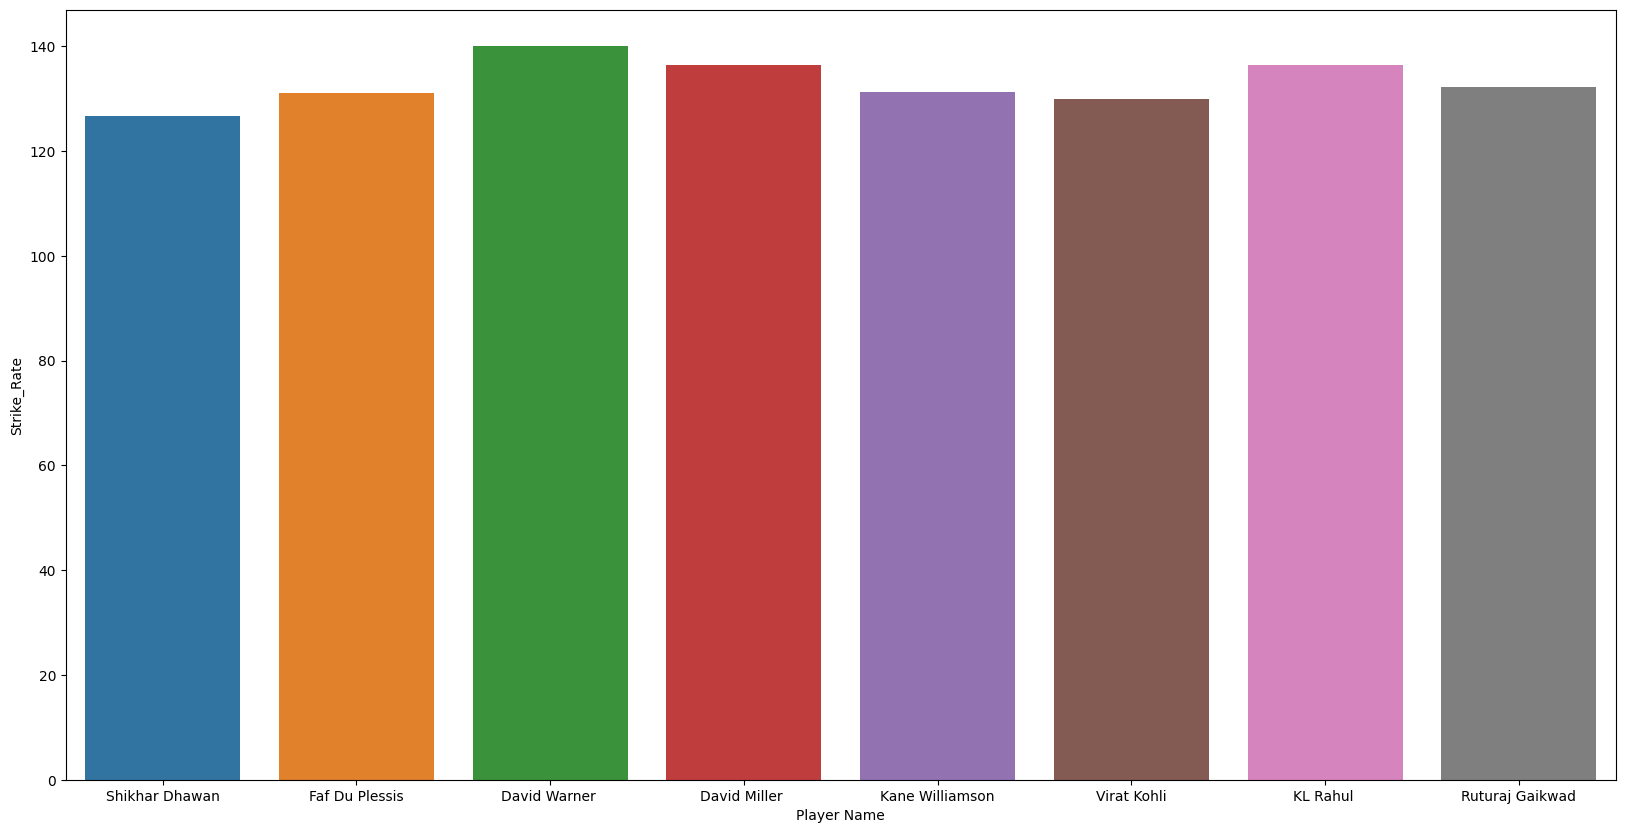

In [33]:
#Visualisation of batters data
#the plot shows each of the top batters strike rate.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Strike_Rate',data=top_batters)

<Axes: xlabel='Player Name', ylabel='Runs'>

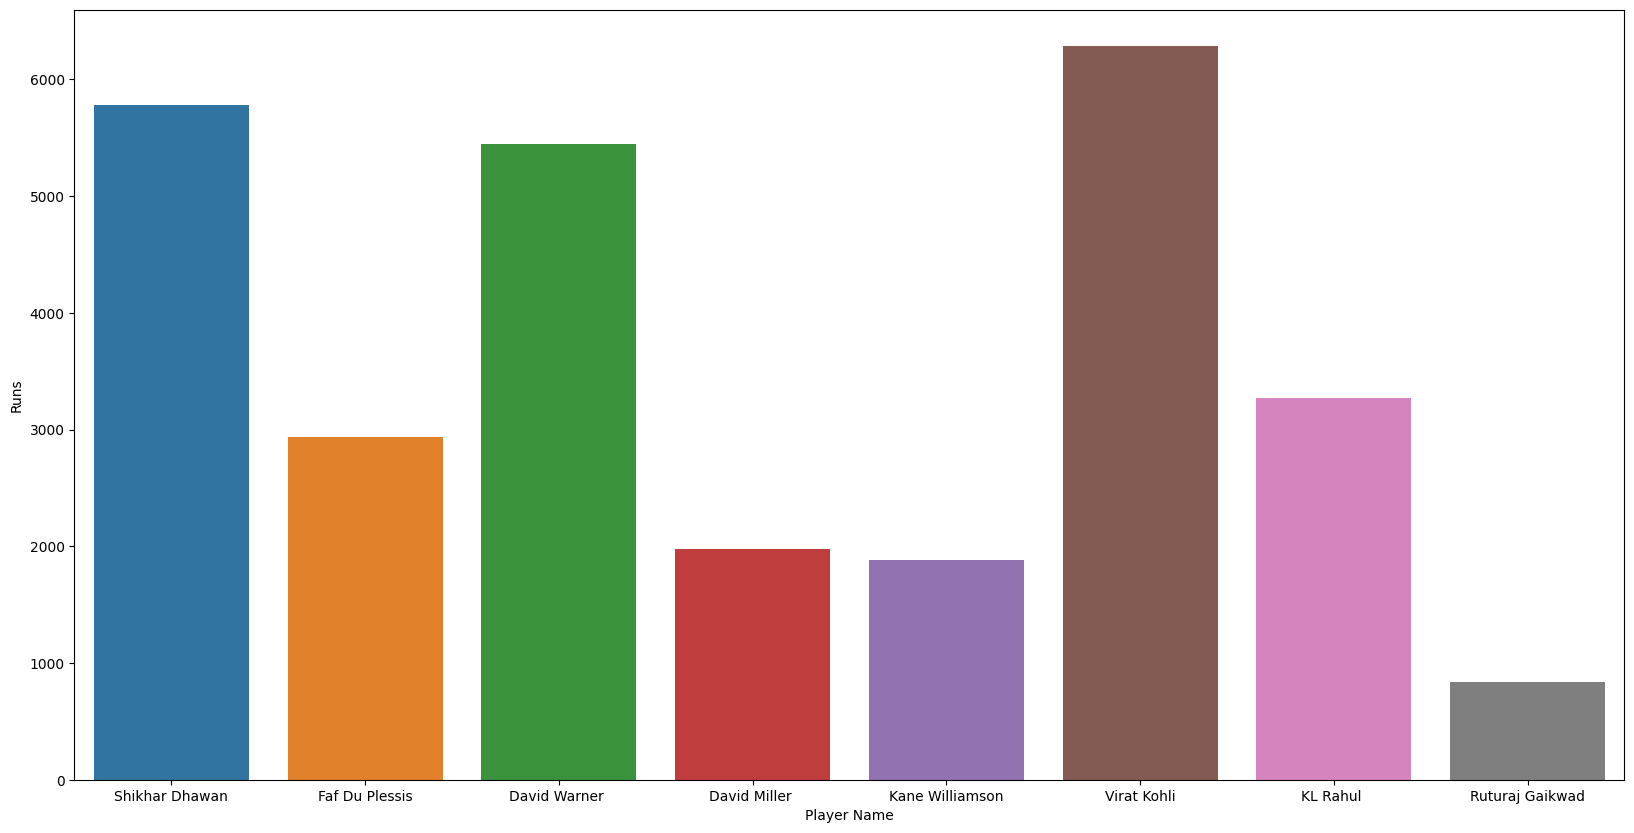

In [34]:
#this plot shows the top batters runs.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Runs',data=top_batters)

<Axes: xlabel='Player Name', ylabel='Average'>

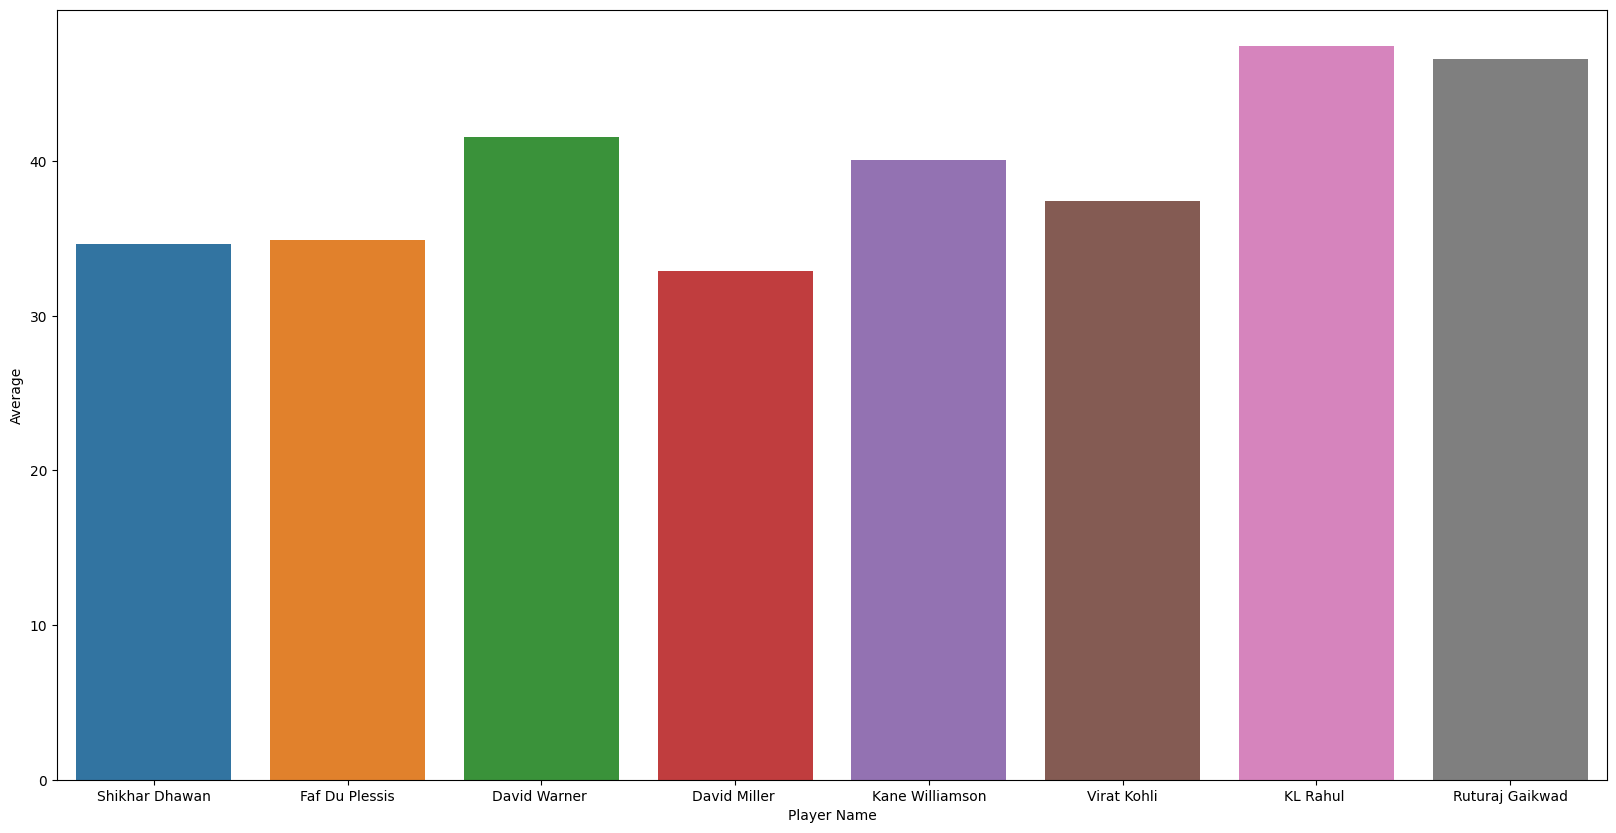

In [35]:
#this plot shows the top batters average
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Average',data=top_batters)

<Axes: xlabel='Player Name', ylabel='Matches_Played'>

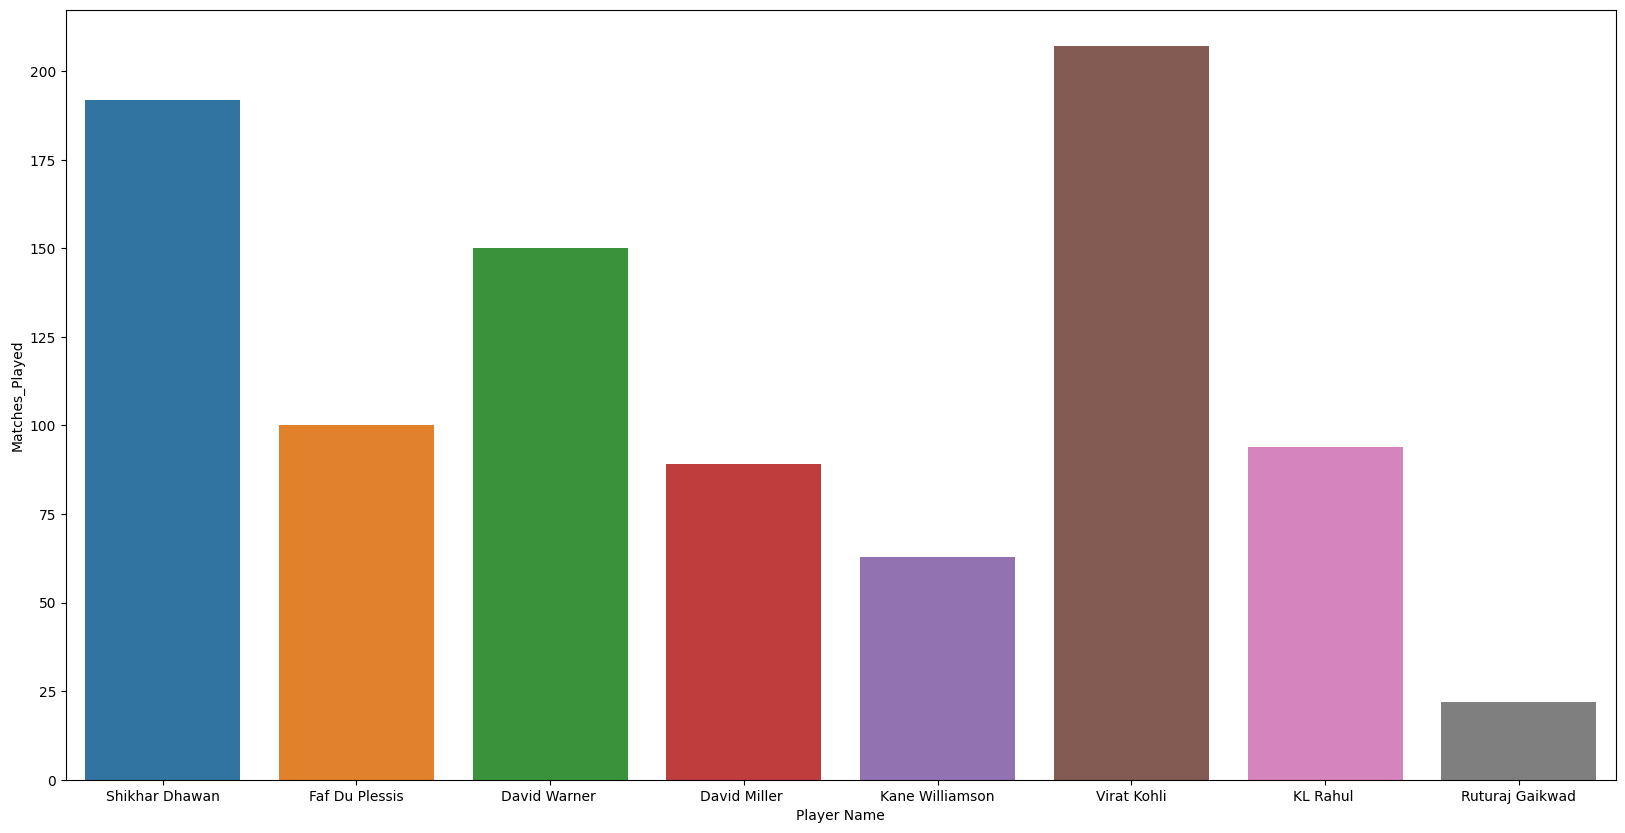

In [36]:
#this plot shows top batters matches played.
plt.figure(figsize=(20,10))
sns.barplot(x='Player Name',y='Matches_Played',data=top_batters)

<Axes: title={'center': 'Average'}>

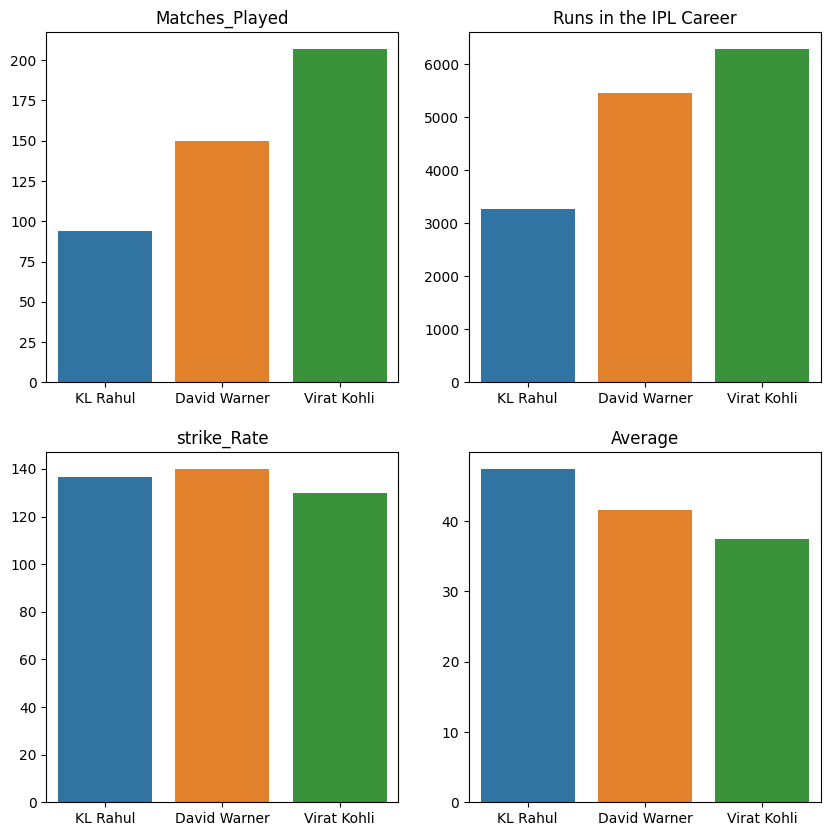

In [41]:
#Top 3 batters - KL Rahul, Virat Kohli, David Warner
#here,we are storing the values of the each player in a separate data frame to use for displaying using barplot.
top_batters.reset_index(drop=True)
matches_values=[top_batters.iloc[6]['Matches_Played'],top_batters.iloc[2]['Matches_Played'],top_batters.iloc[5]['Matches_Played']]
runs_values=[top_batters.iloc[6]['Runs'],top_batters.iloc[2]['Runs'],top_batters.iloc[5]['Runs']]
average_values=[top_batters.iloc[6]['Average'],top_batters.iloc[2]['Average'],top_batters.iloc[5]['Average']]
Strike_rate_values=[top_batters.iloc[6]['Strike_Rate'],top_batters.iloc[2]['Strike_Rate'],top_batters.iloc[5]['Strike_Rate']]
Labels=['KL Rahul','David Warner','Virat Kohli']

fig,axes=plt.subplots(2,2, figsize=(10,10))
axes[0][0].set_title("Matches_Played")
axes[0][1].set_title("Runs in the IPL Career")
axes[1][0].set_title("strike_Rate")
axes[1][1].set_title("Average")

sns.barplot(x=Labels,y=matches_values,ax=axes[0][0])
sns.barplot(x=Labels,y=runs_values,ax=axes[0][1])
sns.barplot(x=Labels,y=Strike_rate_values,ax=axes[1][0])
sns.barplot(x=Labels,y=average_values,ax=axes[1][1])


In [48]:
#Top 3 batters for the IPL 2022 Campaign are Kl.Rahul, David Warner, Virat Kohli
